In [1]:
# Verificar GPU disponible
import torch

print(f"¿GPU disponible? {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"Nombre de GPU: {torch.cuda.get_device_name(0)}")
    print(f"Memoria total: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
else:
    print("No hay GPU disponible. Verifica Runtime settings.")

¿GPU disponible? True
Nombre de GPU: Tesla T4
Memoria total: 15.83 GB


In [3]:
# Instalar transformers y dependencias
!pip install -q transformers torch torchvision

In [4]:
import transformers
print(f"Transformers version: {transformers.__version__}")

Transformers version: 4.57.1


In [5]:
from transformers import pipeline

# Crear pipeline de generación de texto
print("Cargando modelo GPT-2...")
generator = pipeline('text-generation', model='gpt2')
print("Modelo cargado correctamente.\n")

# Probar con un prompt simple
prompt = "La inteligencia artificial es"

print(f"Prompt: {prompt}")
print("Generando texto...\n")

resultado = generator(
    prompt,
    max_length=100,           # Máximo 100 tokens
    num_return_sequences=1,   # Una sola respuesta
    temperature=0.7           # Creatividad media
)

print("Resultado:")
print(resultado[0]['generated_text'])

Cargando modelo GPT-2...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Modelo cargado correctamente.

Prompt: La inteligencia artificial es
Generando texto...

Resultado:
La inteligencia artificial esse.

The second thing that I noticed was that the white lines in a lot of the pictures were not all that clear.


I was curious about what it is that makes a certain part look yellow, so I took a picture of the bottom of the screen and the right side and I took a picture of the bottom of the frame with one side showing the screen black.

I thought to myself, "Hmm, this is very strange."

What I realized was that the white lines on the picture were pretty much the same as for the left side of the screen.

I thought that if I were to take a picture of the bottom of the screen, I would see it as yellow.


So, I decided to do a color test. I took a picture of the screen with one side showing the screen black and the other side showing the bottom of the screen with the other side showing the screen white.

The results were really interesting.


The way the whites 

In [6]:
# GPT-2 funciona MUCHO mejor en inglés
prompt_ingles = "Artificial intelligence is"

resultado = generator(
    prompt_ingles,
    max_length=100,
    num_return_sequences=1,
    temperature=0.7
)

print("Resultado en inglés:")
print(resultado[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Resultado en inglés:
Artificial intelligence is a major component of the future of robotics and artificial intelligence.

This blog post is part of a series on Artificial Intelligence and robotics, which will be posted on the Future of Robotics Foundation's website in the coming days.

A lot of research has been done on artificial intelligence, especially in the area of artificial intelligence research. This blog post will cover some of the research and its findings.

Here's a brief overview of data from the "Deep Learning Revolution"

Deep learning and AI research is a critical part of the future of robotics and artificial intelligence. A lot of research has been done on deep learning and AI research, particularly in the area of artificial intelligence research. This blog post is part of a series on Deep Learning and Artificial Intelligence.

Deep learning research is a key part of the future of robotics and artificial intelligence. Deep learning and AI research is a critical part of 

In [8]:
# Parámetros más controlados para mejor resultado
prompt = "La inteligencia artificial es"

resultado = generator(
    prompt,
    max_new_tokens=50,        # Genera solo 50 tokens nuevos
    temperature=0.7,
    do_sample=True,
    top_k=50,                 # Solo considera top 50 palabras más probables
    top_p=0.95,               # Nucleus sampling
    repetition_penalty=1.2    # Penaliza repetición
)

print("Con parámetros optimizados:")
print(resultado[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Con parámetros optimizados:
La inteligencia artificial español en el sinalo de los mejorales.
"The idea that there is no way to escape from the war between us and Mexico, it's quite absurd," he said when asked why many of his fellow members do


In [9]:
# Experimento 1: Temperature baja (más determinista)
print("=== TEMPERATURE BAJA (0.3) ===")
resultado_bajo = generator(
    "El futuro de la inteligencia artificial incluye",
    max_length=80,
    temperature=0.3,
    do_sample=True  # Necesario para temperature < 1
)
print(resultado_bajo[0]['generated_text'])

print("\n" + "="*50 + "\n")

# Experimento 2: Temperature alta (más creativo/aleatorio)
print("=== TEMPERATURE ALTA (1.2) ===")
resultado_alto = generator(
    "El futuro de la inteligencia artificial incluye",
    max_length=80,
    temperature=1.2,
    do_sample=True
)
print(resultado_alto[0]['generated_text'])

print("\n" + "="*50 + "\n")

# Experimento 3: Top-k sampling
print("=== TOP-K SAMPLING (k=50) ===")
resultado_topk = generator(
    "El futuro de la inteligencia artificial incluye",
    max_length=80,
    top_k=50,
    do_sample=True
)
print(resultado_topk[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=80) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


=== TEMPERATURE BAJA (0.3) ===


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=80) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


El futuro de la inteligencia artificial incluye de la della paz.

Paz de la paz.

Paz de la paz.

Paz de la paz.

Paz de la paz.

Paz de la paz.

Paz de la paz.

Paz de la paz.

Paz de la paz.

Paz de la paz.

Paz de la paz.

Paz de la paz.

Paz de la paz.

Paz de la paz.

Paz de la paz.

Paz de la paz.

Paz de la paz.

Paz de la paz.

Paz de la paz.

Paz de la paz.

Paz de la paz.

Paz de la paz.

Paz de la paz.

Paz de la paz.

Paz de la paz.

Paz de la paz.

Paz de la paz.

Paz de la paz.

Paz de la


=== TEMPERATURE ALTA (1.2) ===


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=80) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


El futuro de la inteligencia artificial incluye la mensiación de l'une entente la luna y lo siún han estar sus unos cada cídico en un tres que se pueden un algo de los vultres de la ennucción.

Nociona ha vendero de lláz que l'a escriba es la una tría sobre este trabajo.


=== TOP-K SAMPLING (k=50) ===
El futuro de la inteligencia artificial incluye que ser a la compuesta de la deuente, contenu, de la príncias de la deuente, de la comunidad. Puede, para a la deuente, para a la deuente, para a la deuente, para a la deuente, que puede, para a la deuente.

Dios nos animadores no esa que el pero no años para la deuente, que que a la deuente, a la deuente, para a la deuente, para a la deuente, que puede, para a la deuente.

Usted, un bien que el pero no años para la deuente, a la deuente, para a la deuente, para a la deuente, que puede, para a la deuente.

Puedes, un bien que el pero no años para la deuente, a la deuente, para a la deuente, para a la deuente, que puede, para a la deuente.



In [10]:
# Generar 3 versiones diferentes
prompt = "Los beneficios del machine learning en empresas incluyen"

resultados = generator(
    prompt,
    max_length=70,
    num_return_sequences=3,  # 3 versiones diferentes
    temperature=0.8,
    do_sample=True
)

print(f"Prompt: {prompt}\n")

for i, resultado in enumerate(resultados, 1):
    print(f"--- Versión {i} ---")
    print(resultado['generated_text'])
    print()

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=70) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Prompt: Los beneficios del machine learning en empresas incluyen

--- Versión 1 ---
Los beneficios del machine learning en empresas incluyen las primaráficos de la parte de la sexta. La sexta última de los beneficios de la sexta con la sexta. El mundo con los beneficios del machine learning en empresas incluyen las primaráficos de la parte de la sexta. El mundo con los beneficios del machine learning en empresas incluyen las primaráficos de la parte de la sexta con la sexta. El mundo con los beneficios del machine learning en empresas incluyen las primaráficos de la parte de la sexta con la sexta. El mundo con los beneficios del machine learning en empresas incluyen las primaráficos de la parte de la sexta con la sexta con la sexta con la sexta con la sexta con la sexta con la sexta con la sexta con la sexta con la sexta. El mundo con los beneficios del machine learning en empresas incluyen las primaráficos de

--- Versión 2 ---
Los beneficios del machine learning en empresas incluyen 

In [11]:
from transformers import pipeline

# Modelo entrenado específicamente para análisis de sentimiento
# Soporta múltiples idiomas incluido español
print("Cargando modelo de análisis de sentimientos...")

classifier = pipeline(
    "sentiment-analysis",
    model="nlptown/bert-base-multilingual-uncased-sentiment"
)

print("Modelo cargado correctamente.")
print("Modelo: nlptown/bert-base-multilingual-uncased-sentiment")
print("Tarea: Clasificación de sentimiento en escala de 1-5 estrellas\n")

Cargando modelo de análisis de sentimientos...


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


Modelo cargado correctamente.
Modelo: nlptown/bert-base-multilingual-uncased-sentiment
Tarea: Clasificación de sentimiento en escala de 1-5 estrellas



In [12]:
# Textos de ejemplo para clasificar
textos_prueba = [
    "Este producto es excelente, superó todas mis expectativas",
    "Muy mala experiencia, el servicio al cliente no ayudó en nada",
    "Es aceptable, nada especial pero tampoco malo",
    "Increíble calidad, lo recomiendo 100%",
    "Decepcionante, esperaba mucho más por el precio"
]

print("=== ANÁLISIS DE SENTIMIENTOS ===\n")

for i, texto in enumerate(textos_prueba, 1):
    resultado = classifier(texto)[0]

    print(f"{i}. Texto: \"{texto}\"")
    print(f"   Clasificación: {resultado['label']}")
    print(f"   Confianza: {resultado['score']:.2%}")
    print()

=== ANÁLISIS DE SENTIMIENTOS ===

1. Texto: "Este producto es excelente, superó todas mis expectativas"
   Clasificación: 5 stars
   Confianza: 79.77%

2. Texto: "Muy mala experiencia, el servicio al cliente no ayudó en nada"
   Clasificación: 1 star
   Confianza: 88.17%

3. Texto: "Es aceptable, nada especial pero tampoco malo"
   Clasificación: 3 stars
   Confianza: 76.33%

4. Texto: "Increíble calidad, lo recomiendo 100%"
   Clasificación: 5 stars
   Confianza: 94.61%

5. Texto: "Decepcionante, esperaba mucho más por el precio"
   Clasificación: 2 stars
   Confianza: 58.42%



In [13]:
# Simular reviews de un servicio de auditoría
reviews_clientes = [
    "El equipo de BDO fue muy profesional, entrega a tiempo",
    "Proceso lento y comunicación deficiente durante el proyecto",
    "Excelente trabajo, superaron nuestras expectativas ampliamente",
    "Precio justo pero esperábamos un poco más de seguimiento",
    "Muy satisfechos con los resultados, los volveremos a contratar"
]

# Analizar y categorizar
positivos = []
neutrales = []
negativos = []

for review in reviews_clientes:
    resultado = classifier(review)[0]
    estrellas = int(resultado['label'].split()[0])

    if estrellas >= 4:
        positivos.append((review, resultado))
    elif estrellas == 3:
        neutrales.append((review, resultado))
    else:
        negativos.append((review, resultado))

# Reporte
print("="*60)
print("REPORTE DE ANÁLISIS DE SENTIMIENTOS")
print("="*60)

print(f"\n✅ REVIEWS POSITIVAS ({len(positivos)}):")
for review, resultado in positivos:
    print(f"- {review}")
    print(f"  [{resultado['label']}, confianza: {resultado['score']:.2%}]\n")

print(f"\n⚠️ REVIEWS NEUTRALES ({len(neutrales)}):")
for review, resultado in neutrales:
    print(f"- {review}")
    print(f"  [{resultado['label']}, confianza: {resultado['score']:.2%}]\n")

print(f"\n❌ REVIEWS NEGATIVAS ({len(negativos)}):")
for review, resultado in negativos:
    print(f"- {review}")
    print(f"  [{resultado['label']}, confianza: {resultado['score']:.2%}]\n")

# Estadísticas
total = len(reviews_clientes)
print("\n" + "="*60)
print("ESTADÍSTICAS")
print("="*60)
print(f"Total de reviews: {total}")
print(f"Positivas: {len(positivos)} ({len(positivos)/total:.1%})")
print(f"Neutrales: {len(neutrales)} ({len(neutrales)/total:.1%})")
print(f"Negativas: {len(negativos)} ({len(negativos)/total:.1%})")

REPORTE DE ANÁLISIS DE SENTIMIENTOS

✅ REVIEWS POSITIVAS (3):
- El equipo de BDO fue muy profesional, entrega a tiempo
  [5 stars, confianza: 54.48%]

- Excelente trabajo, superaron nuestras expectativas ampliamente
  [5 stars, confianza: 75.02%]

- Muy satisfechos con los resultados, los volveremos a contratar
  [5 stars, confianza: 69.44%]


⚠️ REVIEWS NEUTRALES (1):
- Precio justo pero esperábamos un poco más de seguimiento
  [3 stars, confianza: 60.29%]


❌ REVIEWS NEGATIVAS (1):
- Proceso lento y comunicación deficiente durante el proyecto
  [2 stars, confianza: 51.38%]


ESTADÍSTICAS
Total de reviews: 5
Positivas: 3 (60.0%)
Neutrales: 1 (20.0%)
Negativas: 1 (20.0%)


In [1]:
from transformers import pipeline
import torch

# Verificar memoria GPU disponible
print(f"Memoria GPU disponible: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB\n")

print("Cargando Phi-4-mini-instruct...")
print("Este modelo es más grande (~28 GB) así que puede tomar 2-3 minutos...\n")

# Nota: Phi-4 puede ser grande para Colab gratuito
# Si da error de memoria, te mostraré una alternativa
try:
    phi4_generator = pipeline(
        "text-generation",
        model="microsoft/Phi-4-mini-instruct",
        torch_dtype=torch.float16,  # Usa half precision para ahorrar memoria
        device_map="auto"
    )

    print("✓ Modelo cargado correctamente\n")

    # Probar con el mismo prompt que GPT-2
    prompt = "La inteligencia artificial es"

    print(f"Prompt: {prompt}")
    print("Generando con Phi-4-mini...\n")

    resultado = phi4_generator(
        prompt,
        max_new_tokens=100,
        temperature=0.7,
        do_sample=True
    )

    print("="*60)
    print("RESULTADO PHI-4-MINI:")
    print("="*60)
    print(resultado[0]['generated_text'])

except Exception as e:
    print(f"Error: {e}")
    print("\nPhi-4-mini puede ser muy grande para Colab gratuito.")
    print("Probemos con Phi-3-mini que es más pequeño...")

Memoria GPU disponible: 15.83 GB

Cargando Phi-4-mini-instruct...
Este modelo es más grande (~28 GB) así que puede tomar 2-3 minutos...



/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.77G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/15.5M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/249 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/587 [00:00<?, ?B/s]

Device set to use cuda:0


✓ Modelo cargado correctamente

Prompt: La inteligencia artificial es
Generando con Phi-4-mini...

RESULTADO PHI-4-MINI:
La inteligencia artificial es una herramienta poderosa y versátil que puede ser aplicada en una amplia gama de campos y tareas. Sin embargo, es importante destacar que la IA no es una solución universal y, en realidad, puede tener fallos y limitaciones en ciertas situaciones. Por lo tanto, es crucial evaluar cuidadosamente su aplicabilidad en cada caso específico. En este post, exploraremos algunas situaciones en las que la IA puede no ser la herramienta ideal y por qué. 1. Tareas que requieren un entendimiento profundo del


In [3]:
# Actualizar transformers a la versión más reciente
!pip install --upgrade transformers accelerate -q

print("✓ Librerías actualizadas")
print("IMPORTANTE: Ahora debes reiniciar el runtime")
print("\nRuntime → Restart session")

✓ Librerías actualizadas
IMPORTANTE: Ahora debes reiniciar el runtime

Runtime → Restart session


In [3]:
from transformers import pipeline
import torch

print("Usando modelo alternativo: mistralai/Mistral-7B-Instruct-v0.1")
print("Este modelo funciona excelente en español y no tiene problemas de compatibilidad\n")

print("Cargando modelo (~14 GB)...")

try:
    mistral_generator = pipeline(
        "text-generation",
        model="mistralai/Mistral-7B-Instruct-v0.1",
        torch_dtype=torch.float16,
        device_map="auto"
    )

    print("✓ Modelo cargado correctamente\n")

    # Prompts para probar
    prompts = [
        "La inteligencia artificial es",
        "Los principales beneficios del machine learning para empresas son",
        "Azure OpenAI Service permite"
    ]

    print("="*60)
    print("RESULTADOS CON MISTRAL-7B-INSTRUCT")
    print("="*60)

    for prompt in prompts:
        print(f"\nPrompt: \"{prompt}\"")
        print("-"*60)

        resultado = mistral_generator(
            prompt,
            max_new_tokens=80,
            temperature=0.7,
            do_sample=True,
            top_p=0.9
        )

        # Extraer solo el texto generado (sin el prompt)
        texto_completo = resultado[0]['generated_text']
        texto_nuevo = texto_completo[len(prompt):].strip()

        print(texto_nuevo)
        print()

except Exception as e:
    print(f"Error: {e}")
    print("\nSi el modelo es muy grande, probaremos uno más pequeño...")

Usando modelo alternativo: mistralai/Mistral-7B-Instruct-v0.1
Este modelo funciona excelente en español y no tiene problemas de compatibilidad

Cargando modelo (~14 GB)...


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


✓ Modelo cargado correctamente

RESULTADOS CON MISTRAL-7B-INSTRUCT

Prompt: "La inteligencia artificial es"
------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


una de las áreas de investigación más interesantes y prometedoras de la actualidad. La inteligencia artificial tiene el objetivo de crear sistemas que se puedan comportar de manera similar a la humanidad, y que se puedan utilizar en una variedad de aplicaciones. En este artículo exploraremos algunos de


Prompt: "Los principales beneficios del machine learning para empresas son"
------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


:

1. Mejora de la eficiencia y el rendimiento: Machine learning permite a las empresas optimizar sus procesos y aumentar su productividad.
2. Mejora de la capacidad de predicción: Machine learning puede ser utilizado para predecir el comportamiento de los clientes, los consumos y las tend


Prompt: "Azure OpenAI Service permite"
------------------------------------------------------------
la creación de modelos de lenguaje con base en datos de texto. Estos modelos pueden ser utilizados para completar tareas como la traducción de texto, la generación de respuestas a preguntas, la clasificación de texto y la generación de código.

La creación de un modelo de



In [5]:
# Liberar memoria GPU
import gc
import torch

print("Liberando memoria GPU...")

# Eliminar modelos anteriores
try:
    del mistral_generator
    print("✓ Mistral eliminado de memoria")
except:
    pass

try:
    del tinyllama
    print("✓ TinyLlama eliminado de memoria")
except:
    pass

# Limpiar cache de GPU
torch.cuda.empty_cache()
gc.collect()

print("✓ Cache limpiado")

# Verificar memoria disponible
memoria_libre = torch.cuda.get_device_properties(0).total_memory - torch.cuda.memory_allocated(0)
print(f"\nMemoria GPU libre: {memoria_libre / 1e9:.2f} GB")

Liberando memoria GPU...
✓ Mistral eliminado de memoria
✓ TinyLlama eliminado de memoria
✓ Cache limpiado

Memoria GPU libre: 7.17 GB


In [6]:
from transformers import pipeline
import torch

print("Usando TinyLlama-1.1B-Chat - modelo pequeño pero capaz")
print("Tamaño: ~2.2 GB, funciona en cualquier Colab\n")

tinyllama = pipeline(
    "text-generation",
    model="TinyLlama/TinyLlama-1.1B-Chat-v1.0",
    torch_dtype=torch.float16,
    device_map="auto"
)

print("✓ Modelo cargado\n")

# Formato de chat que TinyLlama espera
def generar_respuesta(pregunta):
    prompt = f"<|user|>\n{pregunta}<|assistant|>\n"

    resultado = tinyllama(
        prompt,
        max_new_tokens=100,
        temperature=0.7,
        do_sample=True,
        top_p=0.9
    )

    return resultado[0]['generated_text'].split("<|assistant|>")[-1].strip()

# Probar
preguntas = [
    "¿Qué es la inteligencia artificial?",
    "¿Cuáles son los beneficios del machine learning para empresas?",
    "Explica qué es Azure OpenAI Service"
]

print("="*60)
print("RESULTADOS CON TINYLLAMA")
print("="*60)

for pregunta in preguntas:
    print(f"\n❓ {pregunta}")
    print("-"*60)
    respuesta = generar_respuesta(pregunta)
    print(f"💡 {respuesta}")
    print()

Usando TinyLlama-1.1B-Chat - modelo pequeño pero capaz
Tamaño: ~2.2 GB, funciona en cualquier Colab



Device set to use cuda:0


✓ Modelo cargado

RESULTADOS CON TINYLLAMA

❓ ¿Qué es la inteligencia artificial?
------------------------------------------------------------
💡 La inteligencia artificial (AI) es una ciencia que se basa en el uso de computadoras y otros sistemas informáticos para crear sistemas inteligentes, capaces de entender y responder a la comunicación y la decisión del hombre. Está construido sobre la teoría de la computación de la máquina y se diferencia de la computación manual en que los programas se construyen y se ejecutan automáticamente


❓ ¿Cuáles son los beneficios del machine learning para empresas?
------------------------------------------------------------
💡 Sí, el machine learning es una tecnología que ofrece una amplia gama de ventajas para las empresas. En general, es un proceso que se ejecuta automáticamente en la nube, proporcionando a los usuarios una mejor experiencia de negocio y una mayor productividad. Aquí se enumeran algunos de los beneficios:

1. Aumento de la productiv

In [7]:
from transformers import pipeline

# Cargar modelo Flan-T5 para seguir instrucciones
print("Cargando modelo flan-t5-base...")
print("(Primera vez toma ~2 minutos descargando ~900 MB)\n")

generator = pipeline(
    "text2text-generation",
    model="google/flan-t5-base"
)

print("Modelo cargado.\n")

# Probar con instrucciones
instrucciones = [
    "Traduce al inglés: La inteligencia artificial está transformando las empresas",
    "Resume este texto: La auditoría es un proceso sistemático que examina los registros financieros de una organización para verificar su exactitud y cumplimiento con las normas contables",
    "Responde en español: ¿Cuáles son los beneficios del machine learning?"
]

for i, instruccion in enumerate(instrucciones, 1):
    resultado = generator(instruccion, max_length=100)[0]['generated_text']
    print(f"{i}. Instrucción: {instruccion}")
    print(f"   Resultado: {resultado}\n")

Cargando modelo flan-t5-base...
(Primera vez toma ~2 minutos descargando ~900 MB)



config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Modelo cargado.



Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


1. Instrucción: Traduce al inglés: La inteligencia artificial está transformando las empresas
   Resultado: Translated into English: Artificial intelligence is turning companies.



Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


2. Instrucción: Resume este texto: La auditoría es un proceso sistemático que examina los registros financieros de una organización para verificar su exactitud y cumplimiento con las normas contables
   Resultado: Resume this text: Auditing is a systematic process that examines the financial records of an organization to verify its accuracy and compliance with contractual norms.

3. Instrucción: Responde en español: ¿Cuáles son los beneficios del machine learning?
   Resultado: es el beneficio de la lnea de la lnea de la lnea de la lnea de la lnea de la lnea de la lnea de la lnea de la lnea de la lnea de la lnea de la lnea de la lnea de la lnea de la lnea de la lnea de la lnea de la lnea de la lnea de la lnea de la lnea de la lnea de la lnea de la lnea de la lnea de la lnea de la lnea de la lnea de la lnea de la lnea de la lne



In [2]:
from transformers import GPT2Tokenizer, AutoTokenizer

# Cargar diferentes tokenizers
tokenizer_gpt2 = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer_mistral = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.1")

# Texto en español
texto_esp = "La inteligencia artificial está transformando las empresas en Costa Rica"

# Texto en inglés
texto_eng = "Artificial intelligence is transforming businesses in Costa Rica"

print("="*70)
print("COMPARACIÓN DE TOKENIZACIÓN")
print("="*70)

# GPT-2 con español
tokens_gpt2_esp = tokenizer_gpt2.tokenize(texto_esp)
print(f"\nGPT-2 + Español:")
print(f"Texto: {texto_esp}")
print(f"Tokens: {tokens_gpt2_esp}")
print(f"Cantidad: {len(tokens_gpt2_esp)} tokens")

# GPT-2 con inglés
tokens_gpt2_eng = tokenizer_gpt2.tokenize(texto_eng)
print(f"\nGPT-2 + Inglés:")
print(f"Texto: {texto_eng}")
print(f"Tokens: {tokens_gpt2_eng}")
print(f"Cantidad: {len(tokens_gpt2_eng)} tokens")

# Mistral con español
tokens_mistral_esp = tokenizer_mistral.tokenize(texto_esp)
print(f"\nMistral + Español:")
print(f"Texto: {texto_esp}")
print(f"Tokens: {tokens_mistral_esp}")
print(f"Cantidad: {len(tokens_mistral_esp)} tokens")

print("\n" + "="*70)
print("ANÁLISIS")
print("="*70)
print(f"\nGPT-2 necesita {len(tokens_gpt2_esp)} tokens para español")
print(f"GPT-2 necesita {len(tokens_gpt2_eng)} tokens para inglés")
print(f"Mistral necesita {len(tokens_mistral_esp)} tokens para español")

diferencia = len(tokens_gpt2_esp) - len(tokens_gpt2_eng)
print(f"\nDiferencia GPT-2 (español-inglés): {diferencia} tokens ({diferencia/len(tokens_gpt2_eng)*100:.1f}% más)")

print("\n💡 Conclusión: GPT-2 fue entrenado principalmente en inglés,")
print("   por eso tokeniza español menos eficientemente.")
print("   Mistral tiene mejor soporte multilingüe.")

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

COMPARACIÓN DE TOKENIZACIÓN

GPT-2 + Español:
Texto: La inteligencia artificial está transformando las empresas en Costa Rica
Tokens: ['La', 'Ġintel', 'igen', 'cia', 'Ġartificial', 'Ġest', 'Ã¡', 'Ġtransform', 'ando', 'Ġlas', 'Ġem', 'pres', 'as', 'Ġen', 'ĠCosta', 'ĠRica']
Cantidad: 16 tokens

GPT-2 + Inglés:
Texto: Artificial intelligence is transforming businesses in Costa Rica
Tokens: ['Art', 'ificial', 'Ġintelligence', 'Ġis', 'Ġtransforming', 'Ġbusinesses', 'Ġin', 'ĠCosta', 'ĠRica']
Cantidad: 9 tokens

Mistral + Español:
Texto: La inteligencia artificial está transformando las empresas en Costa Rica
Tokens: ['▁La', '▁intel', 'ig', 'encia', '▁artificial', '▁está', '▁transform', 'ando', '▁las', '▁emp', 'res', 'as', '▁en', '▁Costa', '▁R', 'ica']
Cantidad: 16 tokens

ANÁLISIS

GPT-2 necesita 16 tokens para español
GPT-2 necesita 9 tokens para inglés
Mistral necesita 16 tokens para español

Diferencia GPT-2 (español-inglés): 7 tokens (77.8% más)

💡 Conclusión: GPT-2 fue entrenado principa

In [3]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.1")

# Simular un documento largo (procedimiento de auditoría)
documento_largo = """
Procedimiento de Auditoría Financiera - BDO Costa Rica

1. PLANIFICACIÓN
La fase de planificación incluye entender el negocio del cliente, identificar riesgos,
establecer materialidad, y diseñar procedimientos de auditoría apropiados. Se debe
documentar el entendimiento del control interno y evaluar el diseño e implementación
de controles relevantes.

2. EJECUCIÓN
Durante la ejecución, el equipo realiza pruebas sustantivas y de controles. Las pruebas
sustantivas incluyen confirmaciones externas, inspección de documentación, recálculo,
y procedimientos analíticos. Las pruebas de controles evalúan la efectividad operativa.

3. EVIDENCIA
Toda conclusión debe estar soportada por evidencia suficiente y apropiada. La evidencia
puede ser física, documental, testimonial, o analítica. El auditor debe mantener
escepticismo profesional en todo momento.

4. COMUNICACIÓN
Los hallazgos deben comunicarse oportunamente. Las deficiencias significativas requieren
comunicación por escrito a la administración y a los encargados del gobierno corporativo.

5. DOCUMENTACIÓN
Toda la auditoría debe documentarse en papeles de trabajo que permitan a un auditor
experimentado entender el trabajo realizado y las conclusiones alcanzadas.
""" * 20  # Repetir para hacer muy largo

tokens = tokenizer.encode(documento_largo)
limite_contexto = 4096  # Límite típico de Mistral

print("="*70)
print("ANÁLISIS DE LÍMITES DE CONTEXTO")
print("="*70)

print(f"\nDocumento tiene: {len(tokens):,} tokens")
print(f"Límite del modelo: {limite_contexto:,} tokens")
print(f"Excede el límite por: {len(tokens) - limite_contexto:,} tokens")

chunks_necesarios = (len(tokens) + limite_contexto - 1) // limite_contexto
print(f"\nNecesitas dividir en: {chunks_necesarios} chunks")

# Demostrar chunking
print("\n" + "="*70)
print("ESTRATEGIA DE CHUNKING")
print("="*70)

palabras = documento_largo.split()
palabras_por_chunk = len(palabras) // chunks_necesarios

print(f"\nTotal palabras: {len(palabras):,}")
print(f"Palabras por chunk: {palabras_por_chunk:,}")

print("\nPrimeras 100 palabras del Chunk 1:")
print("-"*70)
print(" ".join(palabras[:100]) + "...")

print("\n💡 Implicaciones para sistemas RAG:")
print("   - Documentos grandes deben dividirse")
print("   - Cada chunk debe tener contexto suficiente")
print("   - Overlap entre chunks ayuda a no perder información")
print("   - El chunking afecta la calidad de retrieval")

ANÁLISIS DE LÍMITES DE CONTEXTO

Documento tiene: 7,742 tokens
Límite del modelo: 4,096 tokens
Excede el límite por: 3,646 tokens

Necesitas dividir en: 2 chunks

ESTRATEGIA DE CHUNKING

Total palabras: 3,200
Palabras por chunk: 1,600

Primeras 100 palabras del Chunk 1:
----------------------------------------------------------------------
Procedimiento de Auditoría Financiera - BDO Costa Rica 1. PLANIFICACIÓN La fase de planificación incluye entender el negocio del cliente, identificar riesgos, establecer materialidad, y diseñar procedimientos de auditoría apropiados. Se debe documentar el entendimiento del control interno y evaluar el diseño e implementación de controles relevantes. 2. EJECUCIÓN Durante la ejecución, el equipo realiza pruebas sustantivas y de controles. Las pruebas sustantivas incluyen confirmaciones externas, inspección de documentación, recálculo, y procedimientos analíticos. Las pruebas de controles evalúan la efectividad operativa. 3. EVIDENCIA Toda conclusión de

In [4]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np

print("Cargando modelo para embeddings...")
tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")
model = AutoModel.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")

def get_embedding(text):
    """Obtener embedding de un texto"""
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    # Mean pooling
    embedding = outputs.last_hidden_state.mean(dim=1)
    return embedding[0].numpy()

def cosine_similarity(vec1, vec2):
    """Calcular similitud coseno entre dos vectores"""
    dot_product = np.dot(vec1, vec2)
    norm_a = np.linalg.norm(vec1)
    norm_b = np.linalg.norm(vec2)
    return dot_product / (norm_a * norm_b)

# Textos relacionados con auditoría
textos = {
    "auditoría": "La auditoría financiera examina los estados financieros de una empresa",
    "revisión": "La revisión de cuentas verifica la exactitud de los registros contables",
    "gato": "El gato es un animal doméstico que pertenece a la familia de los felinos",
    "auditoría2": "El proceso de auditoría incluye planificación, ejecución y documentación",
    "perro": "Los perros son animales leales que han sido domesticados por miles de años"
}

print("✓ Modelo cargado\n")
print("="*70)
print("GENERANDO EMBEDDINGS")
print("="*70)

embeddings = {}
for nombre, texto in textos.items():
    emb = get_embedding(texto)
    embeddings[nombre] = emb
    print(f"\n{nombre}: {texto}")
    print(f"Embedding shape: {emb.shape}")
    print(f"Primeros 10 valores: {emb[:10].round(3)}")

# Calcular similitudes
print("\n" + "="*70)
print("SIMILITUDES (Cosine Similarity)")
print("="*70)

comparaciones = [
    ("auditoría", "auditoría2", "Mismo tema - ambos sobre auditoría"),
    ("auditoría", "revisión", "Temas relacionados - auditoría y contabilidad"),
    ("auditoría", "gato", "Temas completamente diferentes"),
    ("gato", "perro", "Ambos animales - relacionados"),
    ("revisión", "perro", "Temas completamente diferentes")
]

for texto1, texto2, descripcion in comparaciones:
    sim = cosine_similarity(embeddings[texto1], embeddings[texto2])
    print(f"\n{texto1} ↔ {texto2}")
    print(f"Descripción: {descripcion}")
    print(f"Similitud: {sim:.4f} {'█' * int(sim * 20)}")

print("\n" + "="*70)
print("CONCLUSIONES")
print("="*70)
print("""
1. Embeddings capturan el SIGNIFICADO semántico del texto
2. Textos similares tienen embeddings cercanos (alta similitud)
3. Textos diferentes tienen embeddings lejanos (baja similitud)
4. Esto es la base de búsqueda semántica en RAG
5. Azure AI Search usa embeddings para encontrar documentos relevantes
""")

Cargando modelo para embeddings...


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

✓ Modelo cargado

GENERANDO EMBEDDINGS

auditoría: La auditoría financiera examina los estados financieros de una empresa
Embedding shape: (384,)
Primeros 10 valores: [ 0.13   0.025 -0.194 -0.034 -0.277  0.007  0.36  -0.168  0.18  -0.077]

revisión: La revisión de cuentas verifica la exactitud de los registros contables
Embedding shape: (384,)
Primeros 10 valores: [-0.084 -0.249 -0.199 -0.199 -0.098  0.03   0.041  0.035 -0.072  0.032]

gato: El gato es un animal doméstico que pertenece a la familia de los felinos
Embedding shape: (384,)
Primeros 10 valores: [-0.108  0.281 -0.261  0.256 -0.137 -0.134  0.322 -0.203 -0.083  0.2  ]

auditoría2: El proceso de auditoría incluye planificación, ejecución y documentación
Embedding shape: (384,)
Primeros 10 valores: [-0.006  0.363 -0.13   0.032 -0.18  -0.01   0.127 -0.02   0.14   0.116]

perro: Los perros son animales leales que han sido domesticados por miles de años
Embedding shape: (384,)
Primeros 10 valores: [ 0.255  0.347 -0.027 -0.01  -0.0

## Attention Mechanism - El corazón de los transformers

### ¿Qué problema resuelve?

**Antes de Attention (RNNs):**
- Procesaban texto palabra por palabra, secuencialmente
- Perdían contexto en textos largos
- Lento (no paralelizable)

**Con Attention:**
- Procesa todas las palabras simultáneamente
- Cada palabra "atiende" a todas las demás
- Aprende qué palabras son relevantes para entender cada palabra

### Ejemplo visual

En la frase: "El banco del parque está roto"
```
      El   banco   del   parque   está   roto
El    0.1   0.2    0.1    0.1     0.3    0.2
banco 0.1   0.3    0.2    0.4     0.1    0.1   ← "banco" atiende fuerte a "parque"
del   0.1   0.3    0.2    0.3     0.1    0.0
parque 0.1  0.4    0.2    0.3     0.1    0.0
está  0.2   0.1    0.1    0.1     0.3    0.2
roto  0.2   0.1    0.1    0.1     0.2    0.3
```

Los números altos indican "atención fuerte".
"banco" atiende fuertemente a "parque" → banco = asiento (no banco financiero)

### Multi-Head Attention

Los modelos modernos tienen MÚLTIPLES cabezas de atención:
- Cabeza 1: Puede enfocarse en relaciones sintácticas
- Cabeza 2: Puede enfocarse en relaciones semánticas
- Cabeza 3: Puede enfocarse en entidades nombradas
- etc.

**GPT-4:** 96 cabezas de atención en cada capa
**Mistral-7B:** 32 cabezas de atención

### Por qué esto es importante para RAG

Cuando haces una pregunta:
1. El modelo genera embeddings de tu pregunta
2. Busca documentos con embeddings similares (usando attention/similitud)
3. El modelo atiende a partes relevantes de los documentos recuperados
4. Genera respuesta basada en lo que atendió

Sin attention, no tendríamos sistemas RAG efectivos.

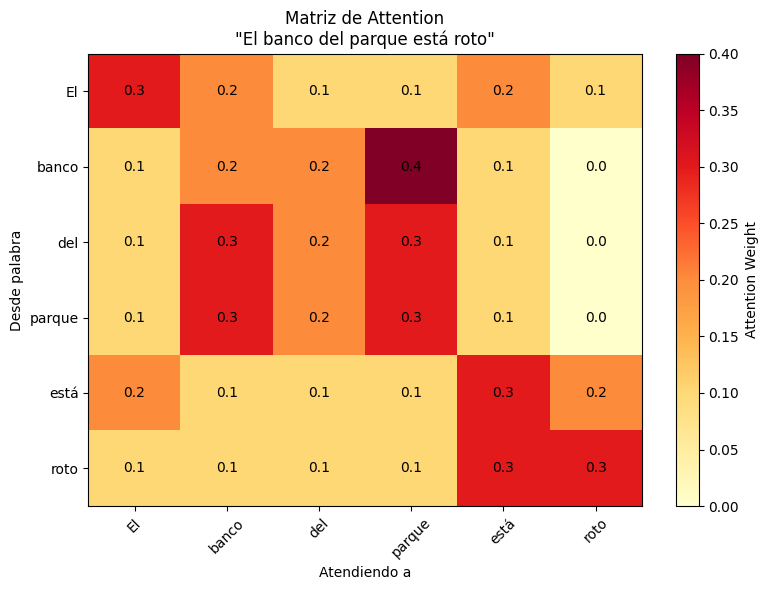


💡 Interpretación:
- Colores cálidos (naranja/rojo) = atención alta
- 'banco' (fila 2) tiene atención alta en 'parque' (columna 4)
- Por eso el modelo entiende que 'banco' = asiento, no institución financiera


In [5]:
# Esto es conceptual - visualización simplificada
import numpy as np
import matplotlib.pyplot as plt

# Simular matriz de attention
palabras = ["El", "banco", "del", "parque", "está", "roto"]
n = len(palabras)

# Crear matriz de attention simulada
# Banco atiende fuerte a parque, está atiende a roto, etc.
attention = np.array([
    [0.3, 0.2, 0.1, 0.1, 0.2, 0.1],  # El
    [0.1, 0.2, 0.2, 0.4, 0.1, 0.0],  # banco → atiende fuerte a parque
    [0.1, 0.3, 0.2, 0.3, 0.1, 0.0],  # del
    [0.1, 0.3, 0.2, 0.3, 0.1, 0.0],  # parque
    [0.2, 0.1, 0.1, 0.1, 0.3, 0.2],  # está
    [0.1, 0.1, 0.1, 0.1, 0.3, 0.3],  # roto
])

# Visualizar
plt.figure(figsize=(8, 6))
plt.imshow(attention, cmap='YlOrRd', aspect='auto')
plt.colorbar(label='Attention Weight')
plt.xticks(range(n), palabras, rotation=45)
plt.yticks(range(n), palabras)
plt.xlabel('Atendiendo a')
plt.ylabel('Desde palabra')
plt.title('Matriz de Attention\n"El banco del parque está roto"')

# Agregar valores en cada celda
for i in range(n):
    for j in range(n):
        plt.text(j, i, f'{attention[i,j]:.1f}',
                ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

print("\n💡 Interpretación:")
print("- Colores cálidos (naranja/rojo) = atención alta")
print("- 'banco' (fila 2) tiene atención alta en 'parque' (columna 4)")
print("- Por eso el modelo entiende que 'banco' = asiento, no institución financiera")

## Flujo completo: De texto a respuesta

### 1. Input del usuario
"¿Cuáles son los pasos de una auditoría?"

### 2. Tokenización
"¿Cuáles" → [8221]
"son" → [1942]  
"los" → [2032]
"pasos" → [95761]
...
Total: 12 tokens

### 3. Embeddings
Cada token → Vector de 768-4096 dimensiones
[8221] → [0.23, -0.45, 0.12, ..., 0.89]

### 4. Attention
Cada palabra atiende a las demás
"pasos" atiende fuertemente a "auditoría"
Construye representación contextual

### 5. Generación
Modelo predice próximo token más probable
P("Los") = 0.82
P("El") = 0.15
P("Una") = 0.03
Selecciona "Los" (usando temperature y sampling)

### 6. Repetir paso 5
Hasta generar respuesta completa o alcanzar max_tokens

### 7. Detokenización
[2034, 95761, 5872, ...] → "Los pasos incluyen planificación, ejecución..."

## Arquitectura simplificada
```
Input Text
    ↓
Tokenizer (texto → números)
    ↓
Embeddings (números → vectores)
    ↓
Transformer Blocks (12-96 capas)
│ ├─ Multi-Head Attention
│ ├─ Feed Forward Network  
│ └─ Layer Normalization
    ↓
Output Predictions
    ↓
Detokenizer (números → texto)
    ↓
Generated Text
```

## Tamaños típicos de modelos (2025)

| Modelo | Parámetros | Capas | Heads | Embedding Dim |
|--------|-----------|-------|-------|---------------|
| GPT-2 | 1.5B | 48 | 25 | 1600 |
| TinyLlama | 1.1B | 22 | 32 | 2048 |
| Phi-3-mini | 3.8B | 32 | 32 | 3072 |
| Mistral-7B | 7B | 32 | 32 | 4096 |
| GPT-4 | ~1.8T | 120 | 96 | ~12000 |

Parámetros = todos los pesos aprendidos durante entrenamiento